In [1]:
#importing all cleaned datasets
import pandas as pd
X_train = pd.read_csv("../cleaned_datasets/X_train.csv")
X_valid = pd.read_csv("../cleaned_datasets/X_valid.csv")
y_train = pd.read_csv("../cleaned_datasets/y_train.csv")
y_valid = pd.read_csv("../cleaned_datasets/y_valid.csv")
X_test = pd.read_csv("../cleaned_datasets/X_test.csv")
y_test = pd.read_csv("../cleaned_datasets/y_test.csv")

This block of code uses the scikit-learn library to implement a voting ensemble method for classification. The ensemble consists of two base estimators, a Random Forest Classifier and an XGBoost Classifier. 

The Random Forest Classifier is set to have a maximum depth of 2, while the XGBoost Classifier is set to have 100 estimators and a maximum depth of 3. These base estimators are then combined using a Voting Classifier. 

The Voting Classifier takes in the base estimators as input and uses a 'soft' voting scheme to make predictions. This means that the classifier uses the predicted probabilities of each base estimator to make the ultimate prediction. 

The ensemble is then fit to the training data using the fit() method and used to make predictions on the test data using the predict() method. 

Additionally, it is possible to assign weights to each base estimator using the 'weights' parameter of the Voting Classifier. This can be used to give more or less importance to a particular base estimator in the final prediction.

# Baseline Model

In [14]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=2)
xgb = XGBClassifier(n_estimators=100, max_depth=3)

ensemble = VotingClassifier(
    estimators = [("rf", forest),("xgb", xgb)],
    voting = 'soft', # to use predict_proba of each classifier before voting
    #weights = [1,2] # to equally weight forest and logreg in the vote
)


In [15]:
ensemble.fit(X_train.values, y_train.values)
print(f'Test Accuracy: {ensemble.score(X_test.values, y_test.values)}')


/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy: 0.8002201430930105


# Hyperparamter Tuning

The given code block uses the scikit-learn library to perform hyperparameter tuning for an ensemble model consisting of a random forest and an XGBoost classifier. Specifically, it uses the GridSearchCV class to exhaustively search over a pre-defined hyperparameter grid to find the combination of hyperparameters that yields the best performance on the training data, as measured by 5-fold cross-validation.

The hyperparameters being tuned include the weights assigned to the two classifiers in the ensemble, the number of trees in the random forest, and the learning rate of the XGBoost classifier. The weight combinations being tested are [1, 1], [2, 1], and [1, 2], which correspond to giving equal weight to both classifiers, giving more weight to the random forest, or giving more weight to the XGBoost classifier, respectively.

The code then fits the GridSearchCV object to the training data and prints out the best hyperparameters and associated score on the training data.



In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'weights': [[1, 1], [2, 1], [1, 2]], # Try different weight combinations
    'rf__n_estimators': [50, 100, 200], # Try different number of trees for the random forest
    'xgb__learning_rate': [0.1, 0.01], # Try different learning rates for the XGBoost
}

grid = GridSearchCV(estimator=ensemble, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

Best parameters:  {'rf__n_estimators': 100, 'weights': [1, 2], 'xgb__learning_rate': 0.1}
Best score:  0.8897717666948436


In [17]:
ensemble_changed = VotingClassifier(
    estimators = [("rf", forest),("xgb", xgb)],
    voting = 'soft', # to use predict_proba of each classifier before voting
    weights = [1,2] 
)

In [19]:
ensemble_changed.fit(X_train.values, y_train.values)
print(f'Test Accuracy: {ensemble.score(X_test.values, y_test.values)}')

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy: 0.82168409466153


# Saving the Best Model

From the grid search we have observed the best hyperparameters and therefore, by modifying the voting classifier, a new model is defined that is expected to perform better than the baseline model. The following block of code saves that model

In [21]:
import pickle
with open('tuned_vc_model.pkl', 'wb') as file:
    pickle.dump(ensemble_changed, file)

# Comparison of Models

First, the code uses the predict_proba() function of each model to obtain the predicted probabilities of the positive class for each data point in the test set. Then, using the roc_curve() function, the false positive rate (FPR), true positive rate (TPR), and threshold values are computed for each model. The area under the ROC curve (AUC) is then calculated for each model using the auc() function.

Next, the code uses matplotlib to plot the ROC curves of both models on the same graph, with each model's AUC score included in the legend. The x-axis shows the FPR, and the y-axis shows the TPR.

After plotting the ROC curves, the code uses the confusion_matrix() function from scikit-learn to calculate the confusion matrices of both models. The resulting matrices are then displayed as images using matplotlib's imshow() function, with the true labels on the y-axis and the predicted labels on the x-axis. The number in each cell represents the count of data points that were predicted to belong to that class. The two matrices are shown side by side using subplots in a single figure.

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


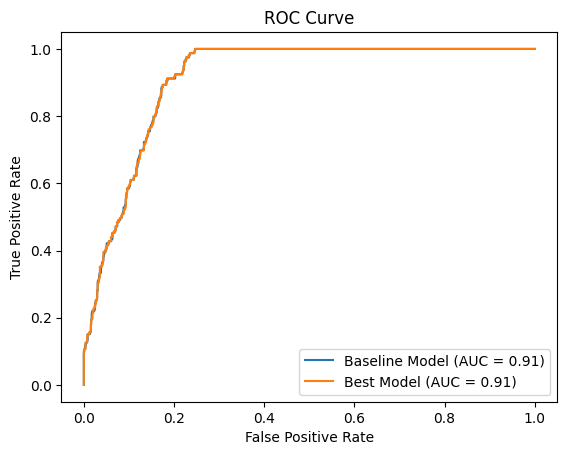

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


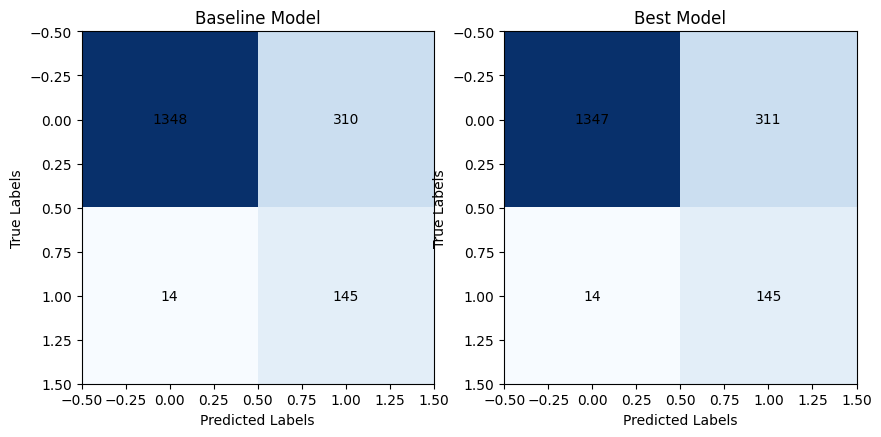

In [23]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have two models: model1 and model2

# Calculate the predicted probabilities of each model
y_pred_prob_model1 = ensemble.predict_proba(X_test)[:,1]
y_pred_prob_model2 = ensemble_changed.predict_proba(X_test)[:,1]

# Calculate the false positive rate, true positive rate, and threshold for both models
fpr_model1, tpr_model1, threshold_model1 = roc_curve(y_test, y_pred_prob_model1)
fpr_model2, tpr_model2, threshold_model2 = roc_curve(y_test, y_pred_prob_model2)

# Calculate the area under the ROC curve (AUC) for both models
auc_model1 = auc(fpr_model1, tpr_model1)
auc_model2 = auc(fpr_model2, tpr_model2)

# Plot the ROC curves for both models
plt.plot(fpr_model1, tpr_model1, label='Baseline Model (AUC = {:.2f})'.format(auc_model1))
plt.plot(fpr_model2, tpr_model2, label='Best Model (AUC = {:.2f})'.format(auc_model2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate the confusion matrix for both models
y_pred_model1 = ensemble.predict(X_test)
y_pred_model2 = ensemble_changed.predict(X_test)
cm_model1 = confusion_matrix(y_test, y_pred_model1)
cm_model2 = confusion_matrix(y_test, y_pred_model2)

# Plot the confusion matrices for both models
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cm_model1, cmap='Blues')
axs[0].set_title('Baseline Model')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].grid(False)
for i in range(cm_model1.shape[0]):
    for j in range(cm_model1.shape[1]):
        axs[0].text(j, i, cm_model1[i, j], ha='center', va='center')
axs[1].imshow(cm_model2, cmap='Blues')
axs[1].set_title('Best Model')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].grid(False)
for i in range(cm_model2.shape[0]):
    for j in range(cm_model2.shape[1]):
        axs[1].text(j, i, cm_model2[i, j], ha='center', va='center')
plt.show()


From the above plots, it is evident that the two models have different accuracy scores but the same AUC, which means that they are achieving similar overall performance in terms of true positive and false positive rates across all possible thresholds, but the accuracy score is only capturing the performance at a single threshold.